In [1]:
### 한글 폰트 설정
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform
import matplotlib

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np

In [5]:
cancer = load_breast_cancer()

malignant = cancer.data[cancer.target == 1]
benign = cancer.data[cancer.target == 0]

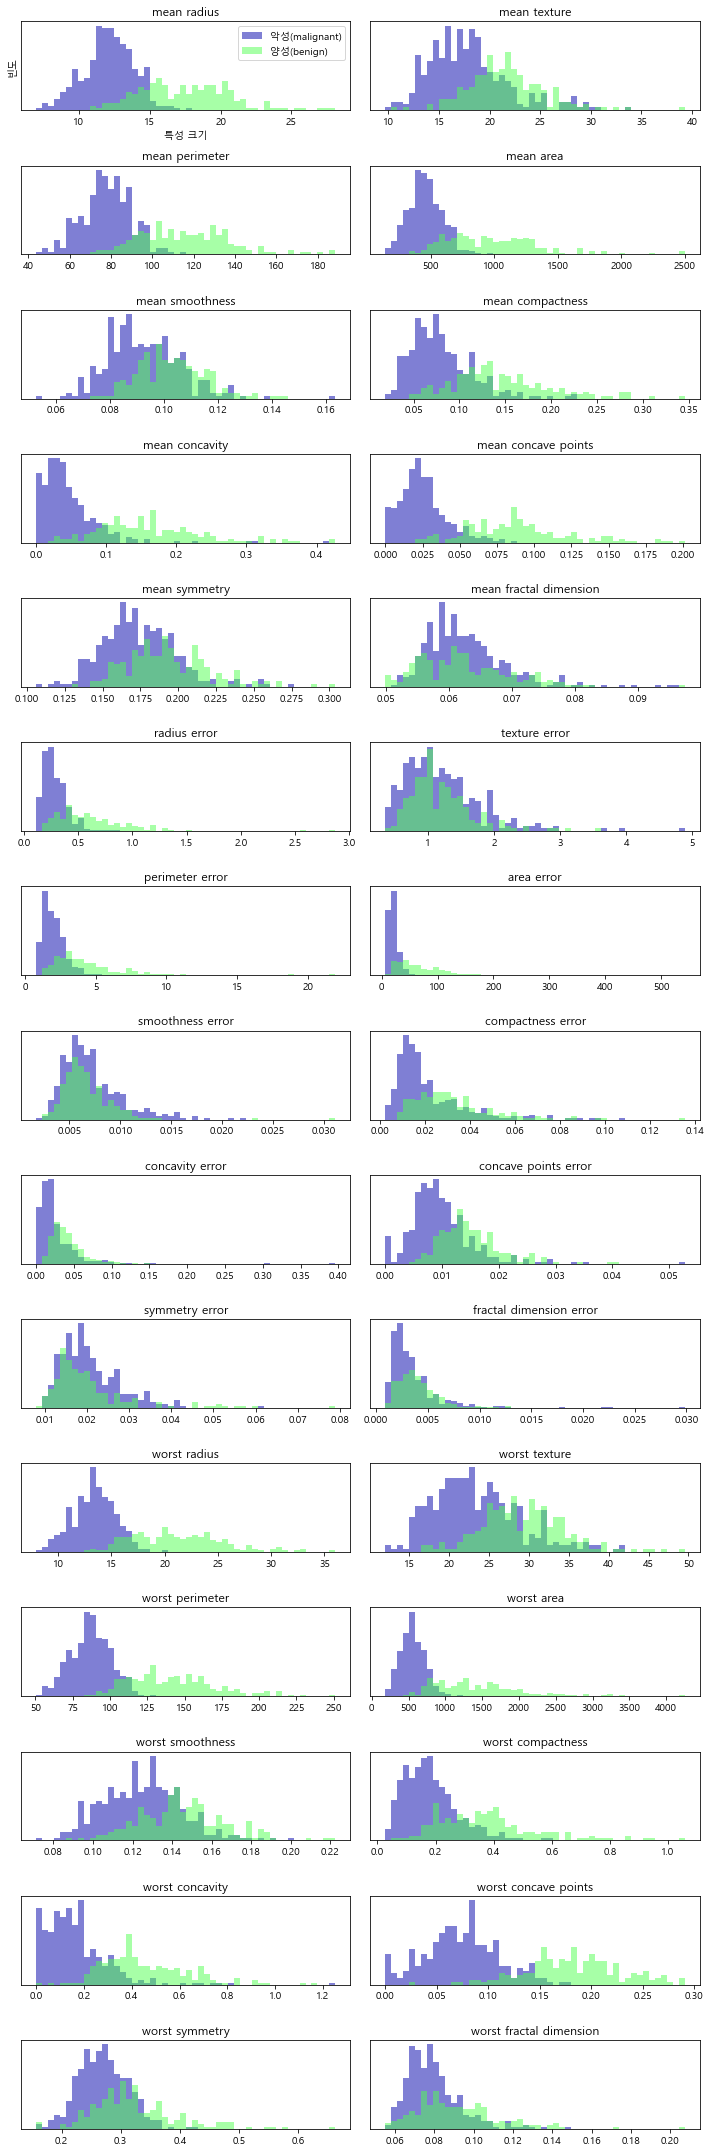

In [6]:
import mglearn

fig, axes = plt.subplots(15, 2, figsize=(10, 30))
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성(malignant)", "양성(benign)"], loc="best")
fig.tight_layout()

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [9]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [10]:
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("원본, PCA변형", X_scaled.shape, X_pca.shape)

원본, PCA변형 (569, 30) (569, 30)


In [11]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print("원본, PCA변형", X_scaled.shape, X_pca.shape)

원본, PCA변형 (569, 30) (569, 2)


Text(0, 0.5, '두 번째 주성분')

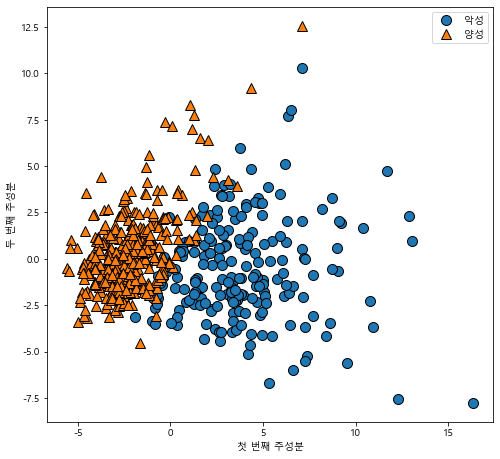

In [12]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 표시
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [13]:
print("PCA 주성분 형태 ", pca.components_.shape)
print("PCA 주성분 :", pca.components_) # 두개의 주성분에 대한 결합- 회귀 계수

PCA 주성분 형태  (2, 30)
PCA 주성분 : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

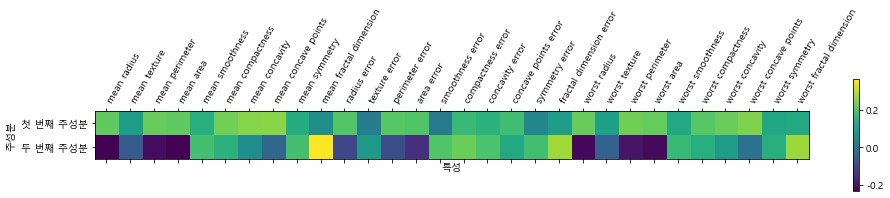

In [14]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [15]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)

Text(0, 0.5, '주성분')

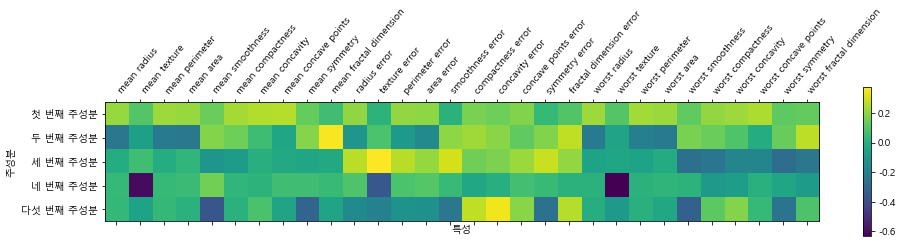

In [16]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3, 4], ["첫 번째 주성분", "두 번째 주성분",
                             "세 번째 주성분", "네 번째 주성분",
                             "다섯 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, 
           rotation=50, 
           ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [17]:
from sklearn.decomposition import PCA
import seaborn as sns
%matplotlib inline

In [18]:
iris = sns.load_dataset("iris")

X_iris = iris.drop("species", axis=1)
y_iris = iris['species']

print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


In [19]:
model = PCA()
X_pca_dat = model.fit(X_iris).transform(X_iris)
print(X_pca_dat.shape, type(X_pca_dat) )

(150, 4) <class 'numpy.ndarray'>


In [20]:
X_pca_dat[0:4]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02]])

In [21]:
import seaborn as sns

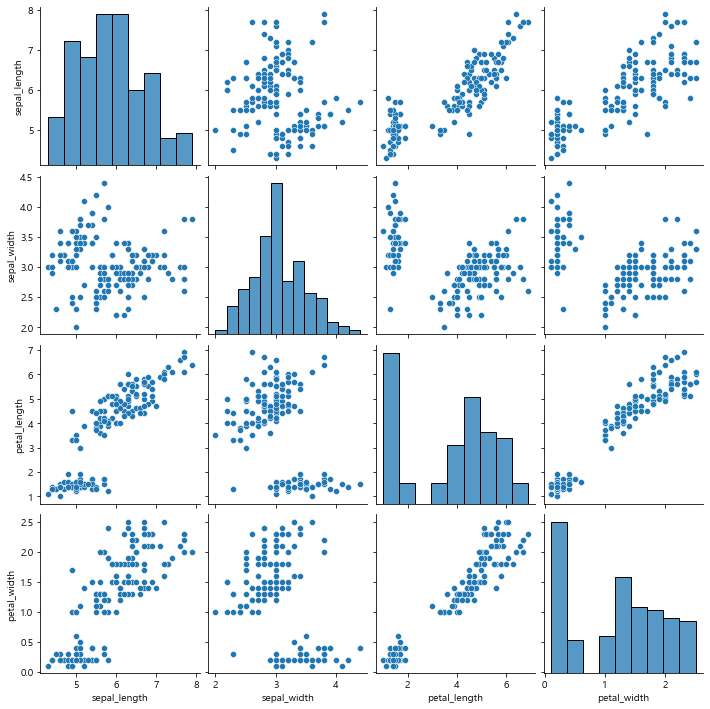

In [22]:
sns.pairplot(iris)

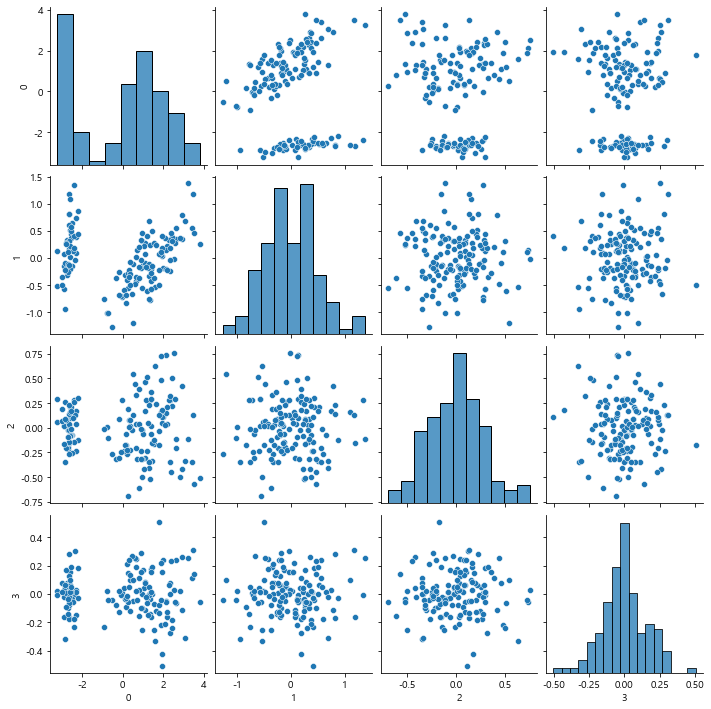

In [23]:
import pandas as pd

df = pd.DataFrame(X_pca_dat[0:,0:])
sns.pairplot(df)

In [24]:
df.corr()

,0,1,2,3
0,1.000000e+00,1.714658e-15,-3.602128e-16,-9.030551e-16
1,1.714658e-15,1.000000e+00,-5.205785e-16,-3.551525e-16
2,-3.602128e-16,-5.205785e-16,1.000000e+00,-3.537852e-16
3,-9.030551e-16,-3.551525e-16,-3.537852e-16,1.000000e+00


In [25]:
# 자원 축소를 2개로 줄여서
model = PCA(n_components=2)
X_pca2 = model.fit(X_iris).transform(X_iris)
print(X_pca2.shape, type(X_pca_dat) )
print(X_pca2)

(150, 2) <class 'numpy.ndarray'>
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


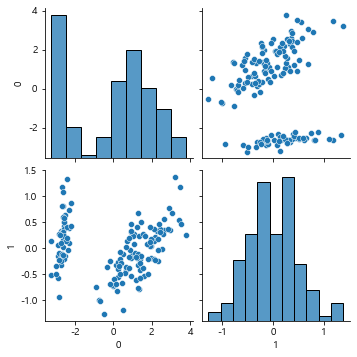

In [26]:
# df = pd.DataFrame(X_pca2[0:,0:])
df = pd.DataFrame(X_pca2)
sns.pairplot(df)
df.head(10)

In [27]:
df.iloc[:,0].head()

0   -2.684126
1   -2.714142
2   -2.888991
3   -2.745343
4   -2.728717
Name: 0, dtype: float64

In [28]:
iris['PCA1'] = df.iloc[:,0]  # feature 생성
iris['PCA2'] = df.iloc[:,1]  # feature 생성
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

Text(0.5, 1.0, 'sepal_width and petal_length')

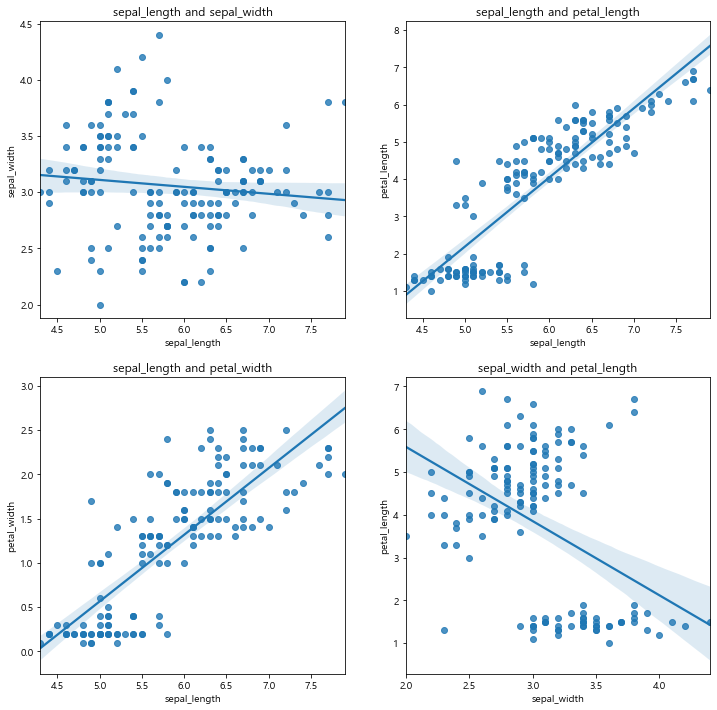

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

sns.regplot("sepal_length", "sepal_width", data=iris, ax=ax[0][0])
ax[0][0].set_title("sepal_length and sepal_width")

sns.regplot("sepal_length", "petal_length", data=iris, ax=ax[0][1])
ax[0][1].set_title("sepal_length and petal_length")

sns.regplot("sepal_length", "petal_width", data=iris, ax=ax[1][0])
ax[1][0].set_title("sepal_length and petal_width")

sns.regplot("sepal_width", "petal_length", data=iris, ax=ax[1][1])
ax[1][1].set_title("sepal_width and petal_length")

In [30]:
# 만들어진 주성분들은 서로서로 상관관계가 거의 없는 독립적 변수이다.
# 독립적인 관계는 머신러닝 모델에서 변수 간에 영향을 끼치며 성능이 떨어지는 것을 해결할 수 있다.